<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Подгатовка-данных-к-моделям" data-toc-modified-id="Подгатовка-данных-к-моделям-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подгатовка данных к моделям</a></span></li><li><span><a href="#Смаштабируем-количественные-данные-друг-к-другу" data-toc-modified-id="Смаштабируем-количественные-данные-друг-к-другу-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Смаштабируем количественные данные друг к другу</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Взвешивание классов</a></span></li></ul></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.utils import shuffle

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Признаки**
    
<li>RowNumber — индекс строки в данных</li>
<li>CustomerId — уникальный идентификатор клиента</li>
<li>Surname — фамилия</li>
<li>CreditScore — кредитный рейтинг</li>
<li>Geography — страна проживания</li>
<li>Gender — пол</li>
<li>Age — возраст</li>
<li>Tenure — сколько лет человек является клиентом банка</li>
<li>Balance — баланс на счёте</li>
<li>NumOfProducts — количество продуктов банка, используемых клиентом</li>
<li>HasCrCard — наличие кредитной карты</li>
<li>IsActiveMember — активность клиента</li>
<li>EstimatedSalary — предполагаемая зарплата</li>

**Целевой признак**

<li>Exited — факт ухода клиента</li>

In [5]:
df.duplicated().sum()

0

<li>Дубликаты не выявлены</li>

In [6]:
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [7]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

<li>Вижу что есть пропущеные значения в Tenure, а так же они целочисленые, заменю пустые значения на 0 и приведу к int(правильно делаю или надо удалить?)</li>
<li>Вижу столбцы которые точно не нужны это: RowNumber, CustomerId, Surname</li>
<li>Столбец EstimatedSalary тоже уберу, потому что я так думаю в базу данных он занесен с помощью модели(если что ревьюер подскажи нужны ли его уберать на самом деле?)</li>
<li>Столбцы Geography и Gender надо будет привести к бинарному виду</li>

In [8]:
df['Tenure'] = df['Tenure'].fillna(0)
df['Tenure'] = df['Tenure'].astype(int)
df['Tenure'].dtypes

dtype('int64')

In [9]:
df = df.drop(['Surname', 'RowNumber', 'CustomerId', 'EstimatedSalary'], axis=1)

In [10]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,4.543400,76485.889288,1.530200,0.70550,0.515100,0.203700
std,96.653299,10.487806,3.111573,62397.405202,0.581654,0.45584,0.499797,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,0.000000
50%,652.000000,37.000000,4.000000,97198.540000,1.000000,1.00000,1.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,1.000000


<li>Видно что есть дисбалан данных Exited</li>
<li>Средней возраст ~39 лет с балансом 76500</li>
<li>Средний кредитный рейтинг 650.5</li>

In [11]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
CreditScore,1.000000,-0.003965,0.003087,0.006268,0.012238,-0.005458,0.025651,-0.027094
Age,-0.003965,1.000000,-0.007368,0.028308,-0.030680,-0.011721,0.085472,0.285323
Tenure,0.003087,-0.007368,1.000000,-0.005821,0.010106,0.021387,-0.025856,-0.013319
Balance,0.006268,0.028308,-0.005821,1.000000,-0.304180,-0.014858,-0.010084,0.118533
NumOfProducts,0.012238,-0.030680,0.010106,-0.304180,1.000000,0.003183,0.009612,-0.047820
HasCrCard,-0.005458,-0.011721,0.021387,-0.014858,0.003183,1.000000,-0.011866,-0.007138
IsActiveMember,0.025651,0.085472,-0.025856,-0.010084,0.009612,-0.011866,1.000000,-0.156128
Exited,-0.027094,0.285323,-0.013319,0.118533,-0.047820,-0.007138,-0.156128,1.000000


<li>Явных зависимостей не увидел, кроме Age к Exited</li>

### Подгатовка данных к моделям

In [12]:
df_ohe = pd.get_dummies(df, drop_first=True)#Привел Geography и Gender к бинарному виду

In [13]:
df_ohe.shape

(10000, 11)

In [14]:
df_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,0,0,1,0
2,502,42,8,159660.80,3,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,0,0,1,0


In [15]:
target = df_ohe['Exited'] 
features = df_ohe.drop('Exited', axis=1) 

In [16]:
features_train, features_buffer, target_train, target_buffer = train_test_split(
    features, target, test_size=0.4, random_state=12345)

In [17]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_buffer, target_buffer, test_size=0.2, random_state=12345)

In [18]:
features_train.shape

(6000, 10)

In [19]:
features_valid.shape

(3200, 10)

In [20]:
features_test.shape

(800, 10)

In [21]:
target_train.shape

(6000,)

In [22]:
target_valid.shape

(3200,)

In [23]:
target_test.shape

(800,)

<li>Разбил данные на три группы в пропорциях 3:1:1</li>

### Смаштабируем количественные данные друг к другу

In [24]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts']
list_choice = ['features_train', 'features_valid', 'features_test', 'features_test', 'target_valid', 'target_test']

In [25]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [26]:
features_train[numeric] = scaler.transform(features_train[numeric])

/tmp/ipykernel_49/3292835044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [27]:
features_valid[numeric] = scaler.transform(features_valid[numeric])

/tmp/ipykernel_49/724773226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_valid[numeric] = scaler.transform(features_valid[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [28]:
features_test[numeric] = scaler.transform(features_test[numeric])

/tmp/ipykernel_49/1266921938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test[numeric] = scaler.transform(features_test[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


***Данные готовые к работе и иследованию***

## Исследование задачи

***Обучение модели DecisionTreeClassifier***

In [29]:
best_depth = 0
best_score_f1 = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    score_f1 = f1_score(target_valid, predictions_valid)
    if score_f1 > best_score_f1:
        best_score_f1 = score_f1
        best_depth = depth
        
print('Модель DecisionTreeRegressor:',
          '\nГлубина дерева:', best_depth,
          '\nf1 мера', round(best_score_f1, 5))

          

Модель DecisionTreeRegressor: 
Глубина дерева: 6 
f1 мера 0.55273


In [30]:
best_depth = 0
best_score_f1 = 0
best_est = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        score_f1 = f1_score(target_valid, predictions_valid)
        if score_f1 > best_score_f1:
                best_score_f1 = score_f1
                best_depth = depth
                best_est = est
print("Модель RandomForestRegressor", "\nКоличество деревьев:", best_est,\
       '\nМаксимальная глубина:', best_depth,
        '\nf1 мера', round(best_score_f1, 5))
print()

Модель RandomForestRegressor 
Количество деревьев: 50 
Максимальная глубина: 10 
f1 мера 0.55268



In [31]:
model = LogisticRegression(random_state=12345, solver='lbfgs')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
score_f1 = f1_score(target_valid, predictions_valid)
print('Для модели линейной регрессии на валидационной выборке',
     '\nf1 мера', round(score_f1, 3))

Для модели линейной регрессии на валидационной выборке 
f1 мера 0.309


### Вывод:

Наилучшой моделью для валидационой выборки при дисбалансе классе оказалась

Модель DecisionTreeRegressor: 
Глубина дерева: 6 
f1 мера 0.55273


Проверим на тестовой выборке

In [32]:
model = DecisionTreeClassifier(random_state=12345, max_depth=6)
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
score_f1 = f1_score(target_test, predictions_test)
print('Модель DecisionTreeRegressor на тестовой выборке:',
          '\nf1 мера', round(score_f1, 3))
print()

Модель DecisionTreeRegressor на тестовой выборке: 
f1 мера 0.572



**На тестовой выборке с дисбалансом получили f1 меру равной 0.572**

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Модели обучены корректно 👍
</div>

## Борьба с дисбалансом

### Увеличение выборки

In [33]:
features_zeros = features_train[target_train == 0] 
features_ones = features_train[target_train == 1] 
target_zeros = target_train[target_train == 0] 
target_ones = target_train[target_train == 1] 

In [34]:
repeat = 4
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

In [35]:
print(features_upsampled.shape)
print(target_upsampled.shape)

(9588, 10)
(9588,)


In [36]:
features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
print(features_upsampled.shape)
print(target_upsampled.shape)

(9588, 10)
(9588,)


In [37]:
best_depth = 0
best_score_f1 = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    score_f1 = f1_score(target_valid, predictions_valid)
    if score_f1 > best_score_f1:
        best_score_f1 = score_f1
        best_depth = depth
        
print('Модель DecisionTreeRegressor:',
          '\nГлубина дерева:', best_depth,
          '\nf1 мера', round(best_score_f1, 5))

Модель DecisionTreeRegressor: 
Глубина дерева: 5 
f1 мера 0.58378


In [38]:
best_depth = 0
best_score_f1 = 0
best_est = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predictions_valid = model.predict(features_valid)
        score_f1 = f1_score(target_valid, predictions_valid)
        if score_f1 > best_score_f1:
                best_score_f1 = score_f1
                best_depth = depth
                best_est = est
print("Модель RandomForestRegressor", "\nКоличество деревьев:", best_est,\
       '\nМаксимальная глубина:', best_depth,
        '\nf1 мера', round(best_score_f1, 5))
print()

Модель RandomForestRegressor 
Количество деревьев: 30 
Максимальная глубина: 8 
f1 мера 0.62164



In [39]:
model = LogisticRegression(random_state=12345, solver='lbfgs')
model.fit(features_upsampled, target_upsampled)
predictions_valid = model.predict(features_valid)
score_f1 = f1_score(target_valid, predictions_valid)
print('Для модели линейной регрессии на валидационной выборке',
     '\nf1 мера', round(score_f1, 3))

Для модели линейной регрессии на валидационной выборке 
f1 мера 0.482


Наилучшей оказалось на сбалансированой выборке методом увелечения: 

    
Модель RandomForestRegressor
    
Количество деревьев: 30 
    
Максимальная глубина: 8 

f1 мера 0.62164

### Уменьшение выборки

In [49]:
features_downsampled = pd.concat(
        [features_zeros.sample(frac=0.1, random_state=12345)] + [features_ones])
target_downsampled = pd.concat(
        [target_zeros.sample(frac=0.1, random_state=12345)] + [target_ones])
features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

In [52]:
features_downsampled.shape

(1676, 10)

In [53]:
target_downsampled.shape

(1676,)

In [54]:
best_depth = 0
best_score_f1 = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)
    score_f1 = f1_score(target_valid, predictions_valid)
    if score_f1 > best_score_f1:
        best_score_f1 = score_f1
        best_depth = depth
        
print('Модель DecisionTreeRegressor:',
          '\nГлубина дерева:', best_depth,
          '\nf1 мера', round(best_score_f1, 5))

Модель DecisionTreeRegressor: 
Глубина дерева: 6 
f1 мера 0.48702


In [55]:
best_depth = 0
best_score_f1 = 0
best_est = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled, target_downsampled)
        predictions_valid = model.predict(features_valid)
        score_f1 = f1_score(target_valid, predictions_valid)
        if score_f1 > best_score_f1:
                best_score_f1 = score_f1
                best_depth = depth
                best_est = est
print("Модель RandomForestRegressor", "\nКоличество деревьев:", best_est,\
       '\nМаксимальная глубина:', best_depth,
        '\nf1 мера', round(best_score_f1, 5))
print()

Модель RandomForestRegressor 
Количество деревьев: 40 
Максимальная глубина: 10 
f1 мера 0.47665



In [56]:
model = LogisticRegression(random_state=12345, solver='lbfgs')
model.fit(features_downsampled, target_downsampled)
predictions_valid = model.predict(features_valid)
score_f1 = f1_score(target_valid, predictions_valid)
print('Для модели линейной регрессии на валидационной выборке',
     '\nf1 мера', round(score_f1, 3))

Для модели линейной регрессии на валидационной выборке 
f1 мера 0.422


Наилучшей оказалось на сбалансированой выборке методом уменьшения: 
    
Модель DecisionTreeRegressor
    
Глубина дерева: 6 
    
f1 мера 0.48702

### Взвешивание классов

In [ ]:
class_weight='balanced'

In [57]:
best_depth = 0
best_score_f1 = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    score_f1 = f1_score(target_valid, predictions_valid)
    if score_f1 > best_score_f1:
        best_score_f1 = score_f1
        best_depth = depth
        
print('Модель DecisionTreeRegressor:',
          '\nГлубина дерева:', best_depth,
          '\nf1 мера', round(best_score_f1, 5))

Модель DecisionTreeRegressor: 
Глубина дерева: 5 
f1 мера 0.58378


In [58]:
best_depth = 0
best_score_f1 = 0
best_est = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        score_f1 = f1_score(target_valid, predictions_valid)
        if score_f1 > best_score_f1:
                best_score_f1 = score_f1
                best_depth = depth
                best_est = est
print("Модель RandomForestRegressor", "\nКоличество деревьев:", best_est,\
       '\nМаксимальная глубина:', best_depth,
        '\nf1 мера', round(best_score_f1, 5))
print()

Модель RandomForestRegressor 
Количество деревьев: 50 
Максимальная глубина: 8 
f1 мера 0.62168



In [61]:
model = LogisticRegression(random_state=12345, solver='lbfgs', class_weight='balanced')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
score_f1 = f1_score(target_valid, predictions_valid)
print('Для модели линейной регрессии на валидационной выборке',
     '\nf1 мера', round(score_f1, 3))

Для модели линейной регрессии на валидационной выборке 
f1 мера 0.482


<b>Наилучший результат показали для разных методов балансировки модели:</b> 

Наилучшей оказалось на сбалансированой выборке методом увелечения:

Модель RandomForestRegressor
f1 мера 0.62164

Наилучшей оказалось на сбалансированой выборке методом взвешивание классов:
Модель RandomForestRegressor

f1 мера 0.62168

Наилучшей оказалось на сбалансированой выборке методом уменьшения:
Модель DecisionTreeRegressor

f1 мера 0.48702

## Тестирование моделей

In [43]:
model = RandomForestClassifier(random_state=12345, n_estimators=30, max_depth=8)
model.fit(features_upsampled, target_upsampled)
predictions_test = model.predict(features_test)
score_f1 = f1_score(target_test, predictions_test)
print('Модель DecisionTreeRegressor на тестовой выборке:',
          '\nf1 мера', round(score_f1, 3))

Модель DecisionTreeRegressor на тестовой выборке: 
f1 мера 0.626



In [64]:
model = DecisionTreeClassifier(random_state=12345, max_depth=6)
model.fit(features_downsampled, target_downsampled)
predictions_test = model.predict(features_test)
score_f1 = f1_score(target_test, predictions_test)  
print('Модель DecisionTreeRegressor:',
          '\nf1 мера', round(score_f1, 3))

Модель DecisionTreeRegressor: 
f1 мера 0.532


In [65]:
model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=8, class_weight='balanced')
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
score_f1 = f1_score(target_test, predictions_test)
print("Модель RandomForestRegressor",
        '\nf1 мера', round(score_f1, 3))

Модель RandomForestRegressor 
f1 мера 0.639


**На тестовой выборке с балансом методом увелечения получили f1 меру равной 0.626**

**На тестовой выборке с балансом методом уменьшения получили f1 меру равной 0.532**

**На тестовой выборке с балансом методом взвешивания классов получили f1 меру равной 0.639**

In [70]:
model = RandomForestClassifier(random_state=12345, n_estimators=30, max_depth=8)
model.fit(features_upsampled, target_upsampled)

probabilities_test_up = model.predict_proba(features_test)
probabilities_one_test_up = probabilities_test_up[:, 1]

fpr_up, tpr_up, thresholds_up = roc_curve(target_test, probabilities_one_test_up)

In [71]:
model = DecisionTreeClassifier(random_state=12345, max_depth=6)
model.fit(features_downsampled, target_downsampled)

probabilities_test_dw = model.predict_proba(features_test)
probabilities_one_test_dw = probabilities_test_dw[:, 1]

fpr_dw, tpr_dw, thresholds_dw = roc_curve(target_test, probabilities_one_test_dw)

In [73]:
model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=8, class_weight='balanced')
model.fit(features_train, target_train)

probabilities_test_bal = model.predict_proba(features_test)
probabilities_one_test_bal = probabilities_test_bal[:, 1]

fpr_bal, tpr_bal, thresholds_bal = roc_curve(target_test, probabilities_one_test_bal)

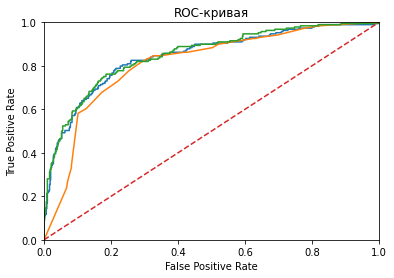

In [74]:
plt.figure()
plt.plot(fpr_up, tpr_up)
plt.plot(fpr_dw, tpr_dw)
plt.plot(fpr_bal, tpr_bal)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [63]:
auc_roc = roc_auc_score(target_test, probabilities_one_test_up)

print(auc_roc)

0.843915343915344


In [76]:
auc_roc = roc_auc_score(target_test, probabilities_one_test_dw)

print(auc_roc)

0.8114548965612796


In [75]:
auc_roc = roc_auc_score(target_test, probabilities_one_test_bal)

print(auc_roc)

0.8501675629335204


## Вывод

Наилучшей моделью оказалась для несбалансированной выборки дерево решений с гипермараметрами глубиной дерева 6

На тестовой выборке значение f1 равняется 0.572

Наилучшей моделью оказалась для сбалансированой выборки слуйчайный лес с гипермараметрами глубиной дерева 10 и глубиной 50

На тестовой выборке значение f1 равняется 0.594

